In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [2]:
datadir = Path("../data/")
wc_presentf = datadir / "Climate"/ "ISEA3H09_WC30AS_V14_BIO.txt"
wc_futuref = datadir / "Climate"/ "ISEA3H09_WC30AS_V14_CMIP5_CCSM4_RCP85_2070_BIO.txt"

# Exploring the WorldClim variables
This data is the 30 arc seconds climate surface data (version 1.4) from www.worldclim.org, aggregated into ISEA3H09 hexagonal grids. The future data was calculated by first simulating the difference between bioclimatic variables of the future and latest available historical data, then adding the difference to the latest available historical data. The simulation was done by CCSM4 under thee RCP8.5 assumption.

The units of the temperature-related variables are 10 * Celsius, so I would need to divide by 10 before doing anything.

## Table of contents:
Exploring the entire set:
* [1. Visualizing histograms](#hist)
    * [Group 1: Temperature-related, mean of something (BIO01, BIO02, BIO08, BIO09, BIO10, BIO11)](#group1)
    * [Group 2: Temperature-related, everything else (BIO03, BIO04, BIO05, BIO06, BIO07)](#group2)
    * [Group 3: Precipitation-related, precipitation of quarters (BIO16, BIO17, BIO18, BIO19)](#group3)
    * [Group 4: Precipitation-related, everything else (BIO12, BIO13, BIO14, BIO15)](#group4)
* [ 2. Visualizing the correlation matrices](#corr)

Exploring the variables for planned training and test areas:
* [ 3. Visualizing histograms](#modelarea-hist)
    * [Group 1: Temperature-related, mean of something (BIO01, BIO02, BIO08, BIO09, BIO10, BIO11)](#model-group1)
    * [Group 2: Temperature-related, everything else (BIO03, BIO04, BIO05, BIO06, BIO07)](#model-group2)
    * [Group 3: Precipitation-related, precipitation of quarters (BIO16, BIO17, BIO18, BIO19)](#model-group3)
    * [Group 4: Precipitation-related, everything else (BIO12, BIO13, BIO14, BIO15)](#model-group4)
* [ 4. Visualizing the correlation matrices](#model-corr)

Exploring the variables for psuedo-presences and psuedo-absences:
* [ 5. Visualizing histograms](#presabs-hist)
    * [Group 1: Temperature-related, mean of something (BIO01, BIO02, BIO08, BIO09, BIO10, BIO11)](#presabs-group1)
    * [Group 2: Temperature-related, everything else (BIO03, BIO04, BIO05, BIO06, BIO07)](#presabs-group2)
    * [Group 3: Precipitation-related, precipitation of quarters (BIO16, BIO17, BIO18, BIO19)](#presabs-group3)
    * [Group 4: Precipitation-related, everything else (BIO12, BIO13, BIO14, BIO15)](#presabs-group4)
* [ 6. Visualizing the correlation matrices](#presabs-corr)


In [3]:
# reading the present-day data
present = pd.read_csv(wc_presentf, sep="\t")
present.sample(5)

,HID,BIO01_Mean,BIO02_Mean,BIO03_Mean,BIO04_Mean,BIO05_Mean,BIO06_Mean,BIO07_Mean,BIO08_Mean,BIO09_Mean,BIO10_Mean,BIO11_Mean,BIO12_Mean,BIO13_Mean,BIO14_Mean,BIO15_Mean,BIO16_Mean,BIO17_Mean,BIO18_Mean,BIO19_Mean
168121,168122,273.947177,131.205644,55.179152,3312.939682,379.984770,144.577440,235.407330,297.208159,225.087333,310.330654,225.087333,838.726769,217.676474,0.677154,114.978792,597.157655,3.946911,367.616525,3.946911
66729,66730,102.124607,118.370967,25.557104,12092.793744,340.918826,-113.091655,454.010480,110.868377,231.785956,254.271250,-55.180109,124.963998,18.993571,2.000000,48.693286,48.760180,10.097001,11.784378,33.050668
98231,98232,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000
88239,88240,46.169261,103.960067,22.371602,12520.402338,256.494636,-197.579754,454.074389,189.724974,-127.488264,194.040827,-127.488264,631.045884,116.845900,9.357605,67.726073,305.911034,40.164964,297.141585,40.164964
177834,177835,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000


In [4]:
# reading the future data
future = pd.read_csv(wc_futuref, sep="\t")
future.sample(5)

,HID,BIO01_Mean,BIO02_Mean,BIO03_Mean,BIO04_Mean,BIO05_Mean,BIO06_Mean,BIO07_Mean,BIO08_Mean,BIO09_Mean,BIO10_Mean,BIO11_Mean,BIO12_Mean,BIO13_Mean,BIO14_Mean,BIO15_Mean,BIO16_Mean,BIO17_Mean,BIO18_Mean,BIO19_Mean
26567,26568,196.882037,111.395869,36.967843,6607.214131,371.211876,73.810415,297.401460,116.715040,281.532939,283.418656,116.715040,557.504868,88.281468,3.171661,60.909243,256.122125,33.225902,33.589352,256.122125
17965,17966,206.268798,134.491995,38.794698,7767.309808,377.073615,34.150152,342.923463,161.573633,297.904751,301.421047,101.752059,1392.038358,143.670838,91.661540,12.719839,406.073688,296.707842,299.184617,364.194259
183886,183887,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000
55239,55240,221.927483,140.550829,71.412336,1517.569712,328.537535,131.465697,197.071838,207.433997,224.951314,242.839572,205.014508,1928.148008,376.305120,12.138776,83.383526,1040.599112,48.283234,147.487673,1021.579529
14150,14151,111.116594,125.121889,26.325992,11725.181552,351.023165,-113.380497,464.403660,172.693134,-43.435689,260.878143,-43.435689,590.824168,97.893207,14.761094,52.309653,255.012148,50.895397,215.860879,50.895397


In [5]:
# check for missing data - seems to be none
print("Present-day null values:", present.isnull().values.any())
print("Future null values:", future.isnull().values.any())

Present-day null values: False
Future null values: False


**About the -1000.00000:**
Those are values where the interpolation is out of scope - WorldClim only has data on land.

In [6]:
# how many hexagonal grids are out of scope
print("Present-day rows containing -1000: ", sum((present==-1000.000000).any(axis=1)))
print("Future rows containing -1000: ", sum((future==-1000.000000).any(axis=1)))

Present-day rows containing -1000:  138425
Future rows containing -1000:  138425


In [7]:
# saving the out-of-scope hexagons to file for visualization in QGIS
WCpresent_OOS = present[(present==-1000.000000).any(axis=1)]
WCfuture_OOS = future[(future==-1000.000000).any(axis=1)]

WCpresent_OOS.drop(WCpresent_OOS.columns.difference(['HID']), 1,inplace=True)
WCfuture_OOS.drop(WCfuture_OOS.columns.difference(['HID']), 1,inplace=True)

WCpresent_OOS["historical_OOS"] = 1
WCfuture_OOS["future_OOS"] = 1

print("Out of scope hexagons consistent:", (WCpresent_OOS["historical_OOS"] == WCfuture_OOS["future_OOS"]).all())

#WCpresent_OOS.to_csv("wc_historical_OOS.csv", index=False)
#WCfuture_OOS.to_csv("wc_future_OOS.csv", index=False)

Out of scope hexagons consistent: True


/Users/t-r-espr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-7-83d08b267a50>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WCpresent_OOS["historical_OOS"] = 1
<ipython-input-7-83d08b267a50>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [8]:
# exclude out-of-scope hexagons
present = present[(present!=-1000.000000).all(axis=1)]
future = future[(future!=-1000.000000).all(axis=1)]

**Get the temperature-related variables in Celsius:**
The original units are 10 * Celsius, so I will need to convert

In [9]:
# variables that need conversion i.e. need to be divided by 10.
need_to_convert = ["BIO01_Mean", "BIO02_Mean", "BIO08_Mean", "BIO09_Mean", "BIO10_Mean", "BIO11_Mean",
                   "BIO04_Mean", "BIO05_Mean", "BIO06_Mean", "BIO07_Mean"]

# convert the degrees
present[need_to_convert] = present[need_to_convert]/10
future[need_to_convert] = future[need_to_convert]/10

In [10]:
# basic statistics, present-day
present.describe()

,HID,BIO01_Mean,BIO02_Mean,BIO03_Mean,BIO04_Mean,BIO05_Mean,BIO06_Mean,BIO07_Mean,BIO08_Mean,BIO09_Mean,BIO10_Mean,BIO11_Mean,BIO12_Mean,BIO13_Mean,BIO14_Mean,BIO15_Mean,BIO16_Mean,BIO17_Mean,BIO18_Mean,BIO19_Mean
count,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000
mean,68047.715856,13.072281,11.385913,44.628589,666.709584,28.426897,-2.203590,30.630487,17.987373,8.818857,21.350416,4.356261,847.171243,141.355842,23.994085,64.042212,373.741683,84.911611,238.256241,159.027903
std,46491.893269,13.244111,3.085677,21.075776,494.336441,8.907377,18.655465,13.659051,9.358609,18.557871,8.451635,18.755664,800.527036,128.834878,38.100970,35.335608,342.807215,126.637382,216.311406,244.431541
min,1.000000,-24.596847,0.944443,9.000000,7.699996,-5.704820,-53.424350,5.360000,-24.048329,-43.877200,-9.342838,-47.484989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37047.500000,2.800642,9.003046,25.066032,225.192957,23.009507,-17.445343,19.315445,11.408714,-6.715308,15.495637,-10.808214,275.893490,50.089111,1.826495,35.750402,128.481901,9.278108,81.808861,22.060174
50%,60546.000000,17.371968,11.368588,43.361631,593.602259,30.594383,3.366573,29.839457,19.829934,16.861767,23.793386,10.431310,576.730968,94.948352,10.009060,58.392907,249.168780,38.803826,191.272126,62.419635
75%,84933.500000,24.842023,13.832422,60.183840,1017.979565,34.082679,13.453815,40.262153,25.681002,24.225503,27.375040,21.059336,1205.751586,212.796424,27.902240,87.486552,560.060422,99.801226,322.304708,172.170917
max,195662.000000,31.404849,20.206482,94.500018,2261.581446,48.712025,25.792857,72.430427,37.289488,36.136977,37.819288,28.882000,7775.508207,1714.665114,477.689918,233.134778,3878.517267,1510.326287,3020.802083,3253.774091


In [11]:
# basic statistics, future
future.describe()

,HID,BIO01_Mean,BIO02_Mean,BIO03_Mean,BIO04_Mean,BIO05_Mean,BIO06_Mean,BIO07_Mean,BIO08_Mean,BIO09_Mean,BIO10_Mean,BIO11_Mean,BIO12_Mean,BIO13_Mean,BIO14_Mean,BIO15_Mean,BIO16_Mean,BIO17_Mean,BIO18_Mean,BIO19_Mean
count,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000,58407.000000
mean,68047.715856,16.977877,11.333761,44.119622,655.032918,32.457453,1.994391,30.463062,20.946885,13.348912,25.179644,8.438448,885.248118,151.538758,24.459950,64.561414,395.183374,88.002603,237.548963,182.642618
std,46491.893269,12.344654,3.165820,20.822706,467.431002,8.840140,17.257218,13.050727,9.610071,17.325949,8.253543,17.462886,840.449182,141.029709,39.576475,36.685117,368.445168,134.317257,226.772757,275.335206
min,1.000000,-19.771235,0.949998,7.237353,7.100000,-2.168015,-46.324062,5.287500,-19.300896,-38.383336,-5.750594,-41.420346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37047.500000,7.253162,9.013296,24.997597,222.845614,27.717283,-11.388323,19.537886,14.348568,-1.340064,19.840196,-5.571704,305.590567,53.500244,1.736101,34.057040,137.535215,9.844200,83.961434,23.823427
50%,60546.000000,20.699961,11.366143,42.535734,606.871032,34.045536,6.362611,30.015393,23.264018,20.337343,27.407306,13.509621,604.714100,100.089478,10.815764,59.168251,257.509290,42.115954,181.650634,71.873392
75%,84933.500000,28.020342,13.792125,60.261082,991.464519,38.187167,16.941534,39.779065,28.641844,27.650423,30.727550,24.327446,1244.665866,224.430394,28.775258,89.775782,584.734331,104.370848,318.607546,192.709305
max,195662.000000,34.617987,20.707727,94.100002,2185.367319,53.379156,28.092857,70.401484,42.200260,40.392437,42.649997,32.205899,9631.585758,1792.438108,499.798616,254.928477,4568.971206,1619.574978,3751.166026,3433.972526


## 1. Visualizing histograms <a class="anchor" id="hist"></a>

In [12]:
# Roughly splitting the indices into groups for visualization purposes

# Group 1: Temperature-related, mean of something (BIO01, BIO02, BIO08, BIO09, BIO10, BIO11)
group1 = ["BIO01_Mean", "BIO02_Mean", "BIO08_Mean", "BIO09_Mean", "BIO10_Mean", "BIO11_Mean"]

# Group 2: Temperature-related, everything else (BIO03, BIO04, BIO05, BIO06, BIO07)
group2 = ["BIO03_Mean", "BIO04_Mean", "BIO05_Mean", "BIO06_Mean", "BIO07_Mean"]

# Group 3: Precipitation-related, precipitation of quarters (BIO16, BIO17, BIO18, BIO19)
group3 = ["BIO16_Mean", "BIO17_Mean", "BIO18_Mean", "BIO19_Mean"]

# Group 4: Precipitation-related, everything else (BIO12, BIO13, BIO14, BIO15)
group4 = ["BIO12_Mean", "BIO13_Mean", "BIO14_Mean", "BIO15_Mean"]

# dictionary of what the bioclimatic variables are
var_dict={"BIO01_Mean": "Annual Mean Temperature", "BIO02_Mean":"Mean Diurnal Range (Mean of monthly (max temp - min temp))", 
          "BIO03_Mean":"Isothermality (BIO2/BIO7) (×100)", "BIO04_Mean":"Temperature Seasonality (standard deviation ×100)", 
          "BIO05_Mean":"Max Temperature of Warmest Month", "BIO06_Mean":"Min Temperature of Coldest Month", 
          "BIO07_Mean":"Temperature Annual Range (BIO5-BIO6)", "BIO08_Mean":"Mean Temperature of Wettest Quarter", 
          "BIO09_Mean":"Mean Temperature of Driest Quarter", "BIO10_Mean":"Mean Temperature of Warmest Quarter", 
          "BIO11_Mean":"Mean Temperature of Coldest Quarter","BIO12_Mean":"Annual Precipitation", 
          "BIO13_Mean":"Precipitation of Wettest Month", "BIO14_Mean":"Precipitation of Driest Month", 
          "BIO15_Mean":"Precipitation Seasonality (Coefficient of Variation)","BIO16_Mean":"Precipitation of Wettest Quarter", 
          "BIO17_Mean":"Precipitation of Driest Quarter", "BIO18_Mean":"Precipitation of Warmest Quarter", 
          "BIO19_Mean":"Precipitation of Coldest Quarter"}

### Group 1: Temperature-related, mean of something (BIO01, BIO02, BIO08, BIO09, BIO10, BIO11) <a class="anchor" id="group1"></a>

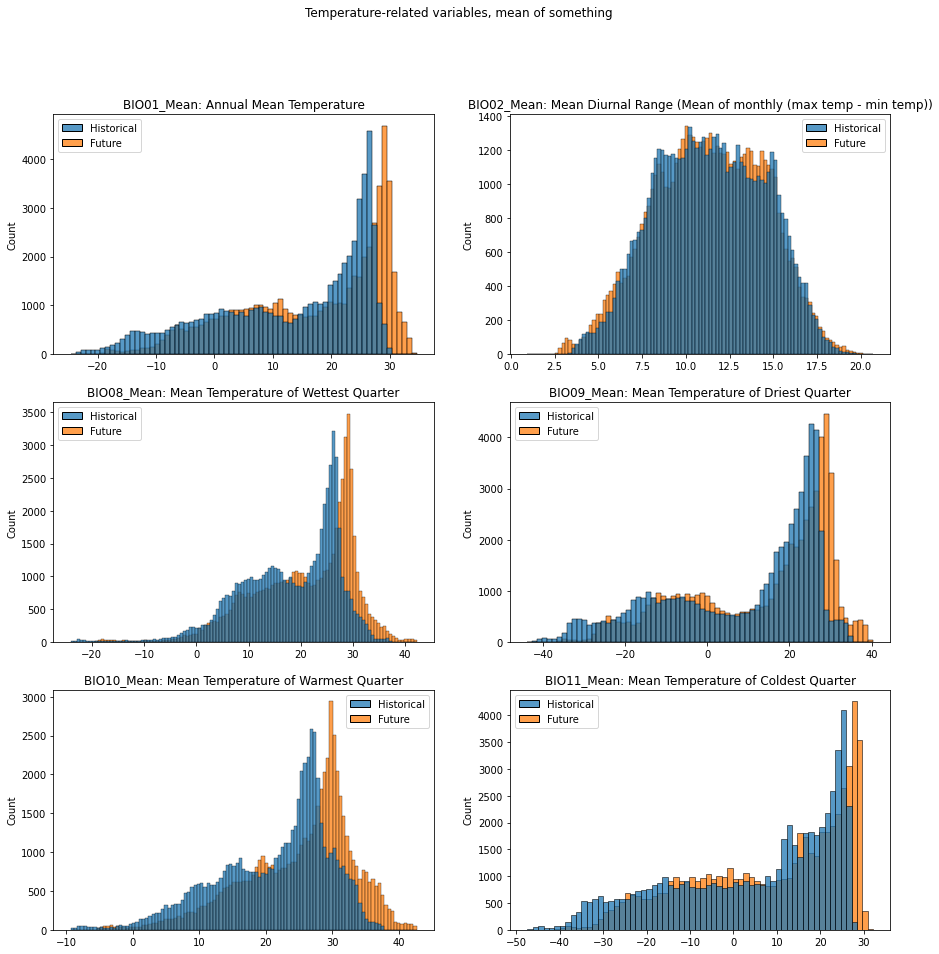

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Temperature-related variables, mean of something')

for idx,ax in zip(group1, axes.flat):
    sns.histplot(ax=ax,data={"Historical": present[idx], "Future": future[idx]})
    ax.set_title(idx+": "+var_dict[idx])

### Group 2: Temperature-related, everything else (BIO03, BIO04, BIO05, BIO06, BIO07) <a class="anchor" id="group2"></a>

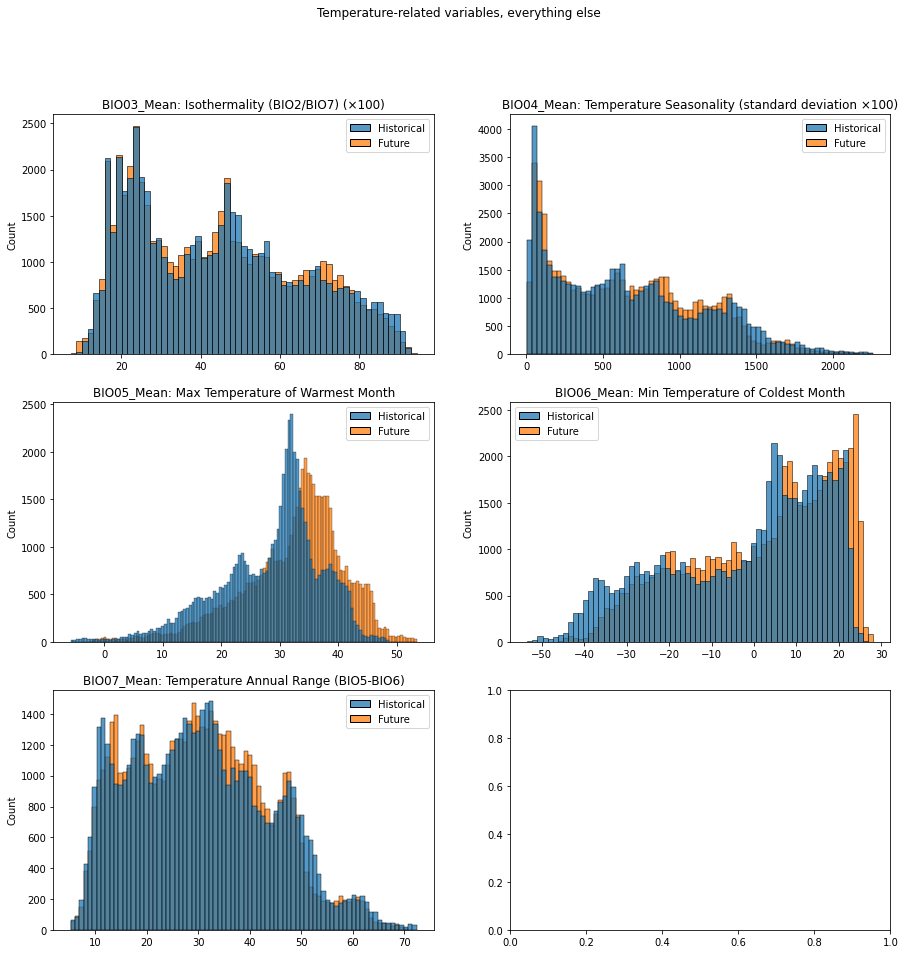

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Temperature-related variables, everything else')

for idx,ax in zip(group2, axes.flat):
    sns.histplot(ax=ax,data={"Historical": present[idx], "Future": future[idx]})
    ax.set_title(idx+": "+var_dict[idx])

### Group 3: Precipitation-related, precipitation of quarters (BIO16, BIO17, BIO18, BIO19) <a class="anchor" id="group3"></a>

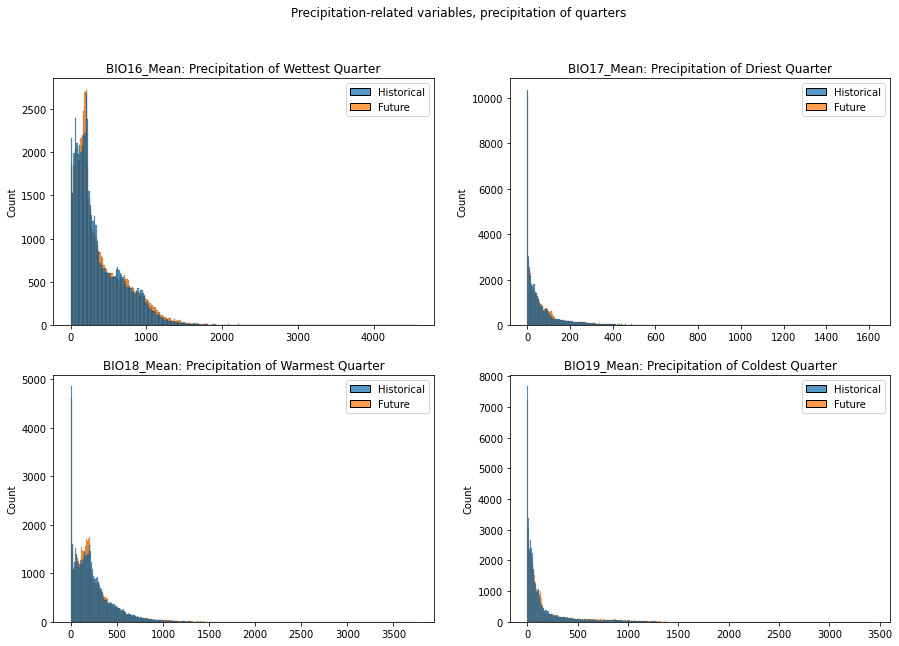

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Precipitation-related variables, precipitation of quarters')

for idx,ax in zip(group3, axes.flat):
    sns.histplot(ax=ax,data={"Historical": present[idx], "Future": future[idx]})
    ax.set_title(idx+": "+var_dict[idx])

### Group 4: Precipitation-related, everything else (BIO12, BIO13, BIO14, BIO15) <a class="anchor" id="group4"></a>

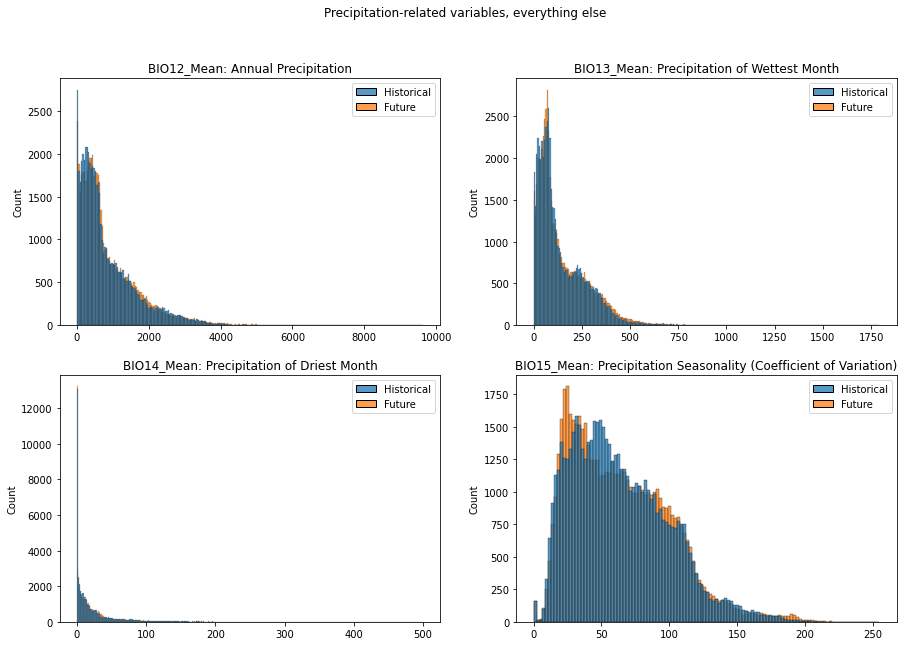

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Precipitation-related variables, everything else')

for idx,ax in zip(group4, axes.flat):
    sns.histplot(ax=ax,data={"Historical": present[idx], "Future": future[idx]})
    ax.set_title(idx+": "+var_dict[idx])

## 2. Visualizing the correlation matrices<a class="anchor" id="corr"></a>

<ipython-input-17-790a98aec075>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1]) # if I  don't do this, I won't get equal sized plots


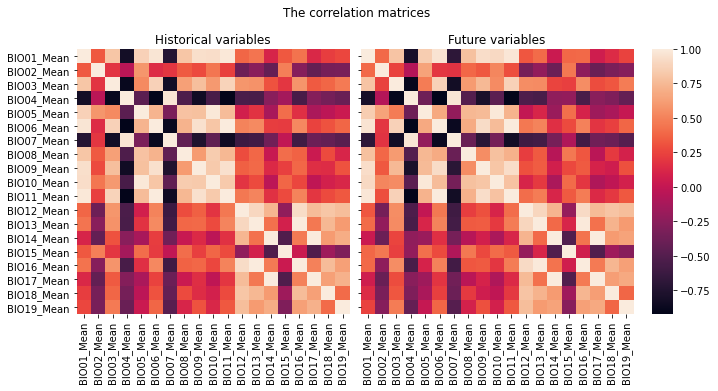

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5.5), sharex=True, sharey=True)
fig.suptitle("The correlation matrices")

# prepare data here
hist_corr = present.drop("HID", axis=1,inplace=False).corr()
future_corr = future.drop("HID", axis=1,inplace=False).corr()

cbar_ax = fig.add_axes([.91, .203, .03, .67]) # place the colorbar using these coordinates
sns.heatmap(ax=axes.flat[0], data=hist_corr, cbar=False)
sns.heatmap(ax=axes.flat[1], data=future_corr, cbar=True,cbar_ax=cbar_ax) # only use the colorbar for second plot

axes.flat[0].set_title("Historical variables")
axes.flat[1].set_title("Future variables")

fig.tight_layout(rect=[0, 0, .9, 1]) # if I  don't do this, I won't get equal sized plots
plt.show()

## II. Exploring the variables for planned training and test areas
The test area is every landmass on Earth.

In [18]:
elephasf = datadir / "Elephas_Maximus"

# reading the data
trainhex = pd.read_csv(elephasf/"Elephas_Maximus_PA_Natural_O20.txt", sep="\t")
testhex = pd.read_csv(elephasf/"Elephas_Maximus_Predictions_GLM_Y1950_Y2000.txt", sep="\t")

In [19]:
traindata = present[present["HID"].isin(list(trainhex.HID))]
testdata = future[future["HID"].isin(list(testhex.HID))]

## 3. Visualizing histograms <a class="anchor" id="modelarea-hist"></a>

### Group 1: Temperature-related, mean of something (BIO01, BIO02, BIO08, BIO09, BIO10, BIO11) <a class="anchor" id="model-group1"></a>

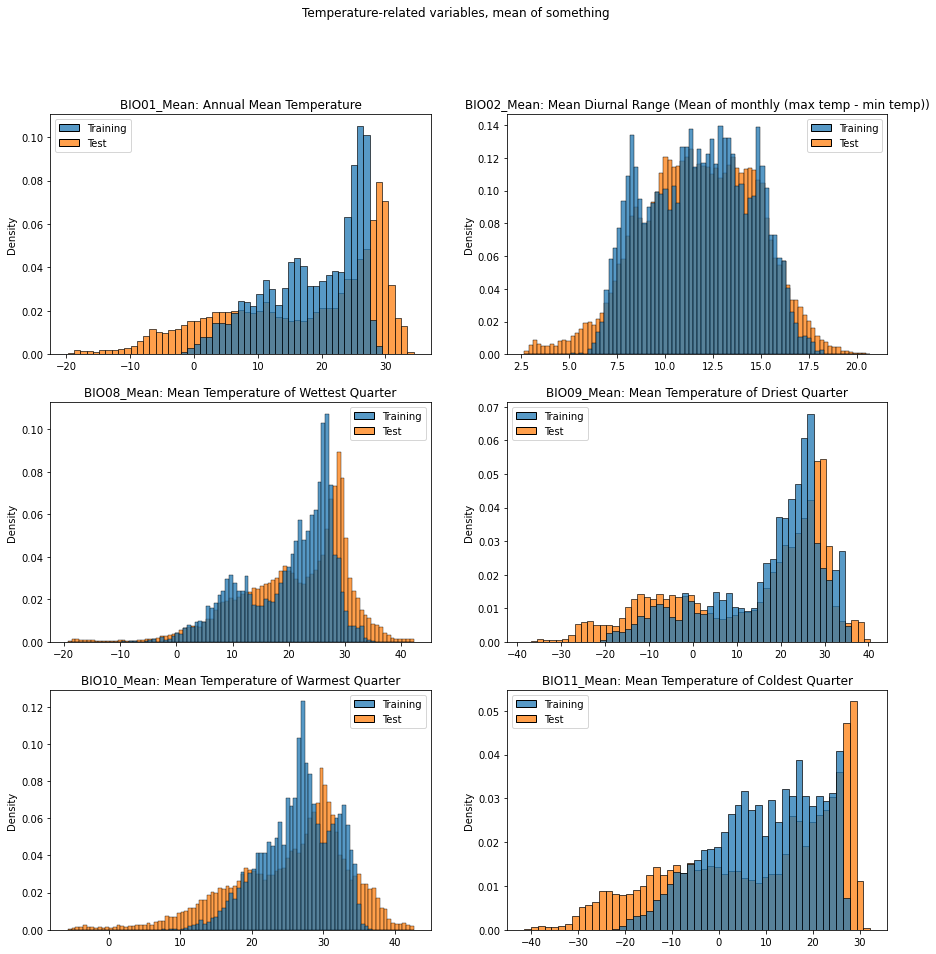

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Temperature-related variables, mean of something')

for idx,ax in zip(group1, axes.flat):
    sns.histplot(ax=ax,data={"Training": traindata[idx], "Test": testdata [idx]},stat="density",common_norm=False)
    ax.set_title(idx+": "+var_dict[idx])

### Group 2: Temperature-related, everything else (BIO03, BIO04, BIO05, BIO06, BIO07) <a class="anchor" id="model-group2"></a>

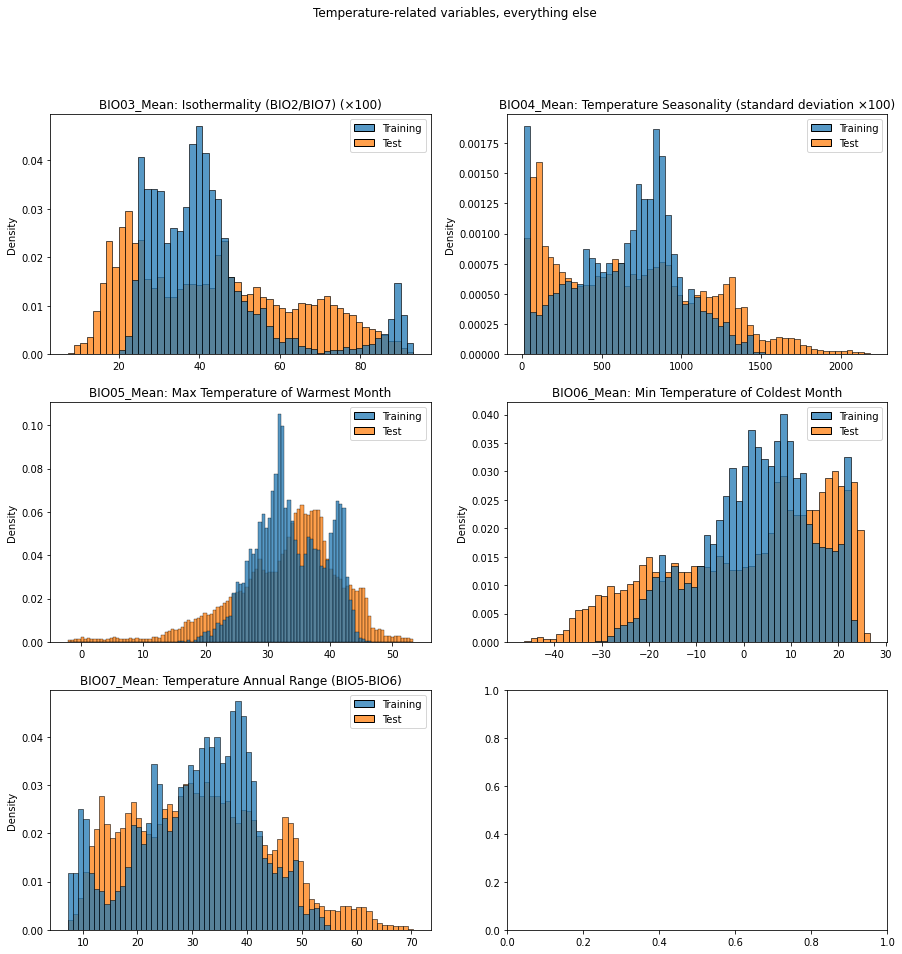

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Temperature-related variables, everything else')

for idx,ax in zip(group2, axes.flat):
    sns.histplot(ax=ax,data={"Training": traindata[idx], "Test": testdata [idx]},stat="density",common_norm=False)
    ax.set_title(idx+": "+var_dict[idx])

### Group 3: Precipitation-related, precipitation of quarters (BIO16, BIO17, BIO18, BIO19) <a class="anchor" id="model-group3"></a>

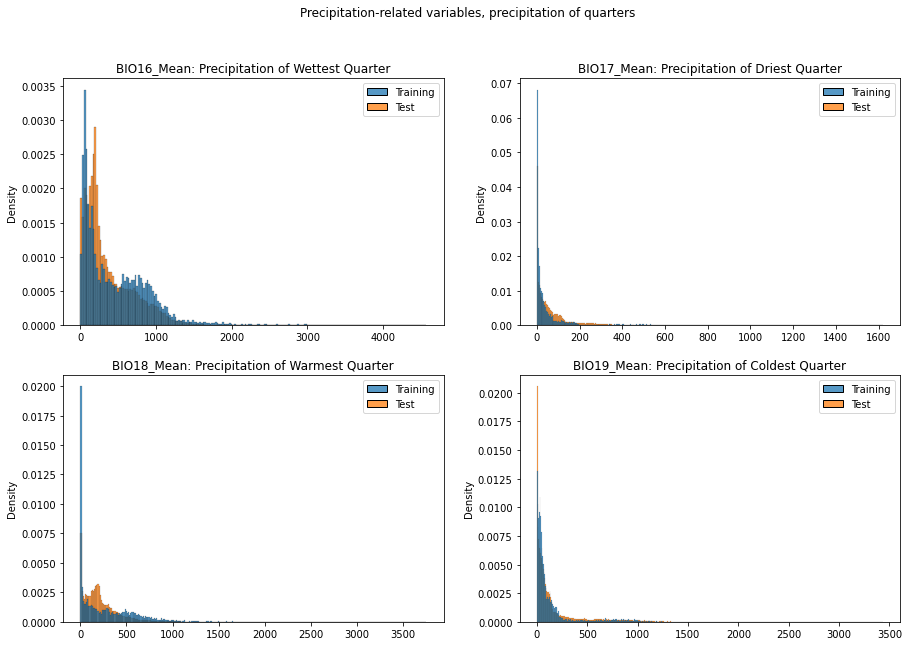

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Precipitation-related variables, precipitation of quarters')

for idx,ax in zip(group3, axes.flat):
    sns.histplot(ax=ax,data={"Training": traindata[idx], "Test": testdata [idx]},stat="density",common_norm=False)
    ax.set_title(idx+": "+var_dict[idx])

### Group 4: Precipitation-related, everything else (BIO12, BIO13, BIO14, BIO15) <a class="anchor" id="model-group4"></a>

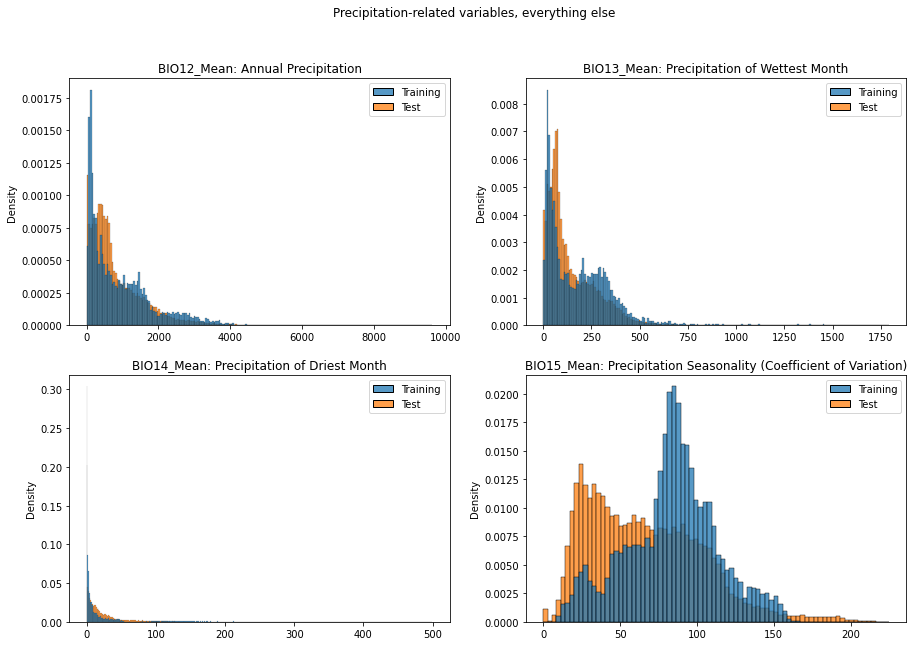

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Precipitation-related variables, everything else')

for idx,ax in zip(group4, axes.flat):
    sns.histplot(ax=ax,data={"Training": traindata[idx], "Test": testdata [idx]},stat="density",common_norm=False)
    ax.set_title(idx+": "+var_dict[idx])

## 4. Visualizing the correlation matrices<a class="anchor" id="model-corr"></a>

<ipython-input-24-e5878f84e937>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1]) # if I  don't do this, I won't get equal sized plots


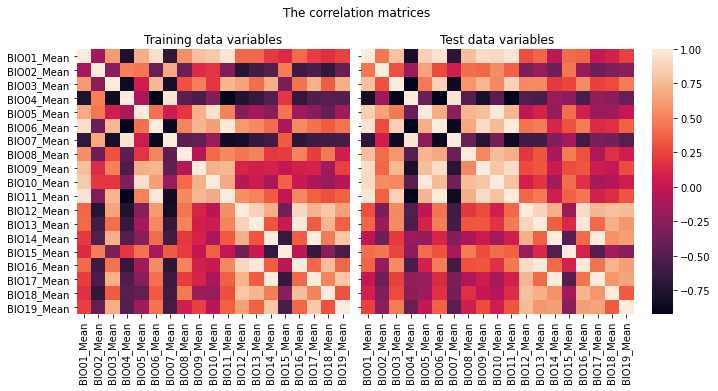

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5.5), sharex=True, sharey=True)
fig.suptitle("The correlation matrices")

# prepare data here
train_corr = traindata.drop("HID", axis=1,inplace=False).corr()
test_corr = testdata.drop("HID", axis=1,inplace=False).corr()

cbar_ax = fig.add_axes([.91, .203, .03, .67]) # place the colorbar using these coordinates
sns.heatmap(ax=axes.flat[0], data=train_corr, cbar=False)
sns.heatmap(ax=axes.flat[1], data=test_corr, cbar=True,cbar_ax=cbar_ax) # only use the colorbar for second plot

axes.flat[0].set_title("Training data variables")
axes.flat[1].set_title("Test data variables")

fig.tight_layout(rect=[0, 0, .9, 1]) # if I  don't do this, I won't get equal sized plots
plt.show()

## III. Exploring the variables for psuedo-presence and psuedo-absence data
Psuedo-presences are areas where the Asian elephants are predicted to exist if humans are not there. Psuedo-absences are areas surrounding the psuedo-presences, controlled to be approximately the same area as the psuedo-presence range.

In [25]:
psuedo_pres = traindata[traindata["HID"].isin(trainhex[trainhex["PA"]==1].HID)]
psuedo_abs = traindata[traindata["HID"].isin(trainhex[trainhex["PA"]==0].HID)]

## 5. Visualizing histograms <a class="anchor" id="presabs-hist"></a>

### Group 1: Temperature-related, mean of something (BIO01, BIO02, BIO08, BIO09, BIO10, BIO11) <a class="anchor" id="presabs-group1"></a>

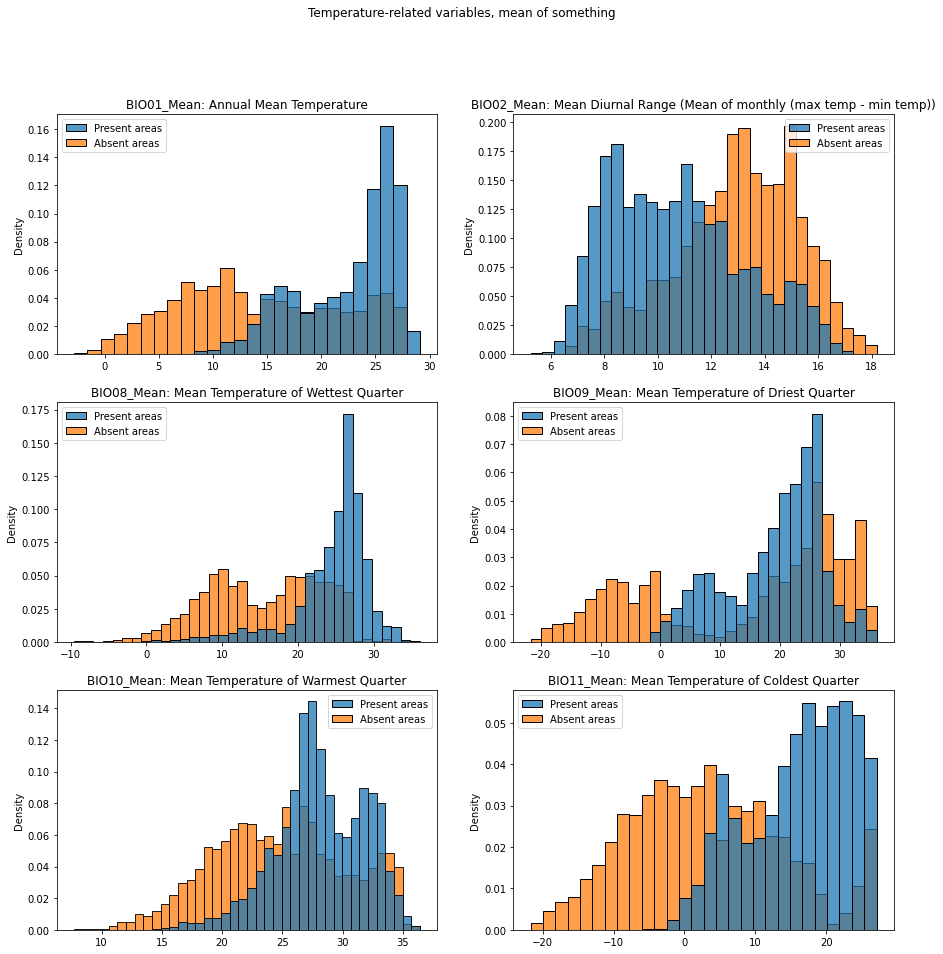

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Temperature-related variables, mean of something')

for idx,ax in zip(group1, axes.flat):
    sns.histplot(ax=ax,data={"Present areas": psuedo_pres[idx], "Absent areas": psuedo_abs[idx]},stat="density",common_norm=False)
    ax.set_title(idx+": "+var_dict[idx])

### Group 2: Temperature-related, everything else (BIO03, BIO04, BIO05, BIO06, BIO07) <a class="anchor" id="presabs-group2"></a>

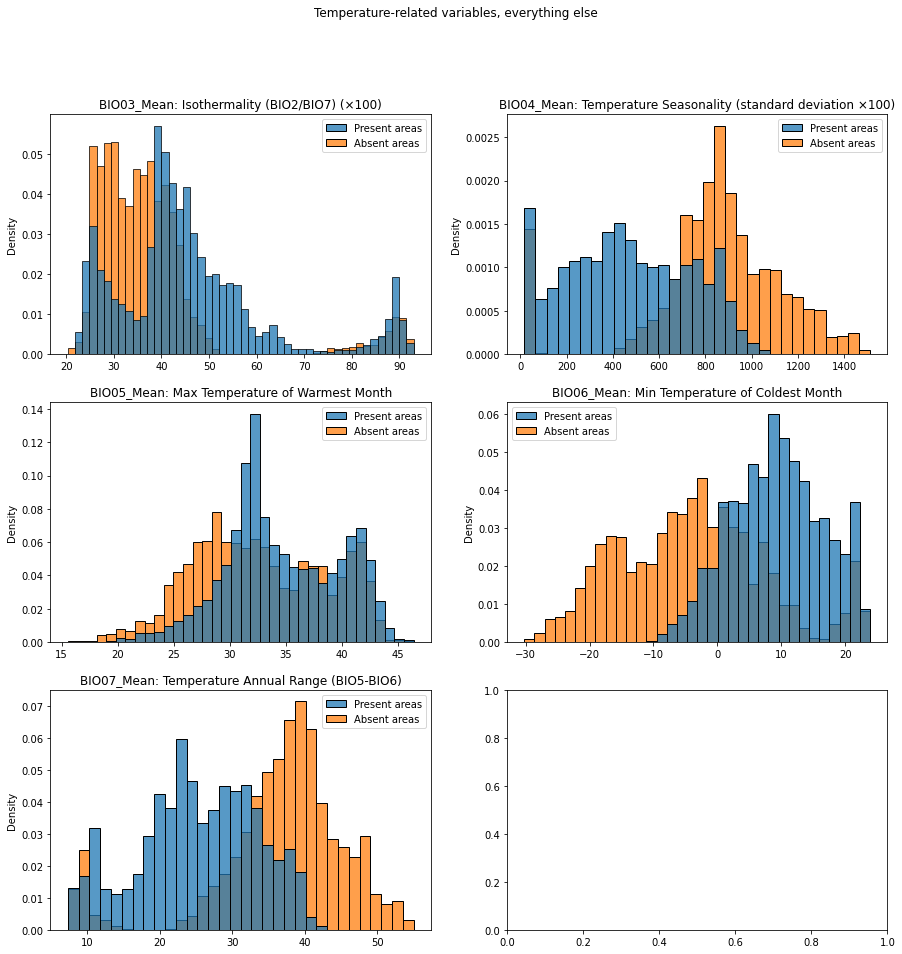

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Temperature-related variables, everything else')

for idx,ax in zip(group2, axes.flat):
    sns.histplot(ax=ax,data={"Present areas": psuedo_pres[idx], "Absent areas": psuedo_abs[idx]},stat="density",common_norm=False)
    ax.set_title(idx+": "+var_dict[idx])

### Group 3: Precipitation-related, precipitation of quarters (BIO16, BIO17, BIO18, BIO19) <a class="anchor" id="presabs-group3"></a>

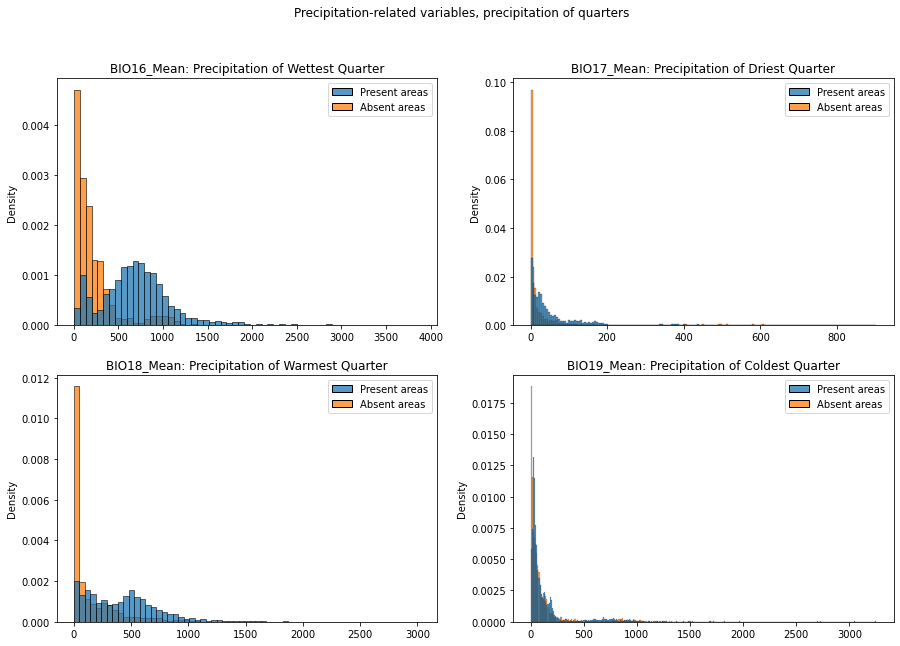

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Precipitation-related variables, precipitation of quarters')

for idx,ax in zip(group3, axes.flat):
    sns.histplot(ax=ax,data={"Present areas": psuedo_pres[idx], "Absent areas": psuedo_abs[idx]},stat="density",common_norm=False)
    ax.set_title(idx+": "+var_dict[idx])

### Group 4: Precipitation-related, everything else (BIO12, BIO13, BIO14, BIO15) <a class="anchor" id="presabs-group4"></a>

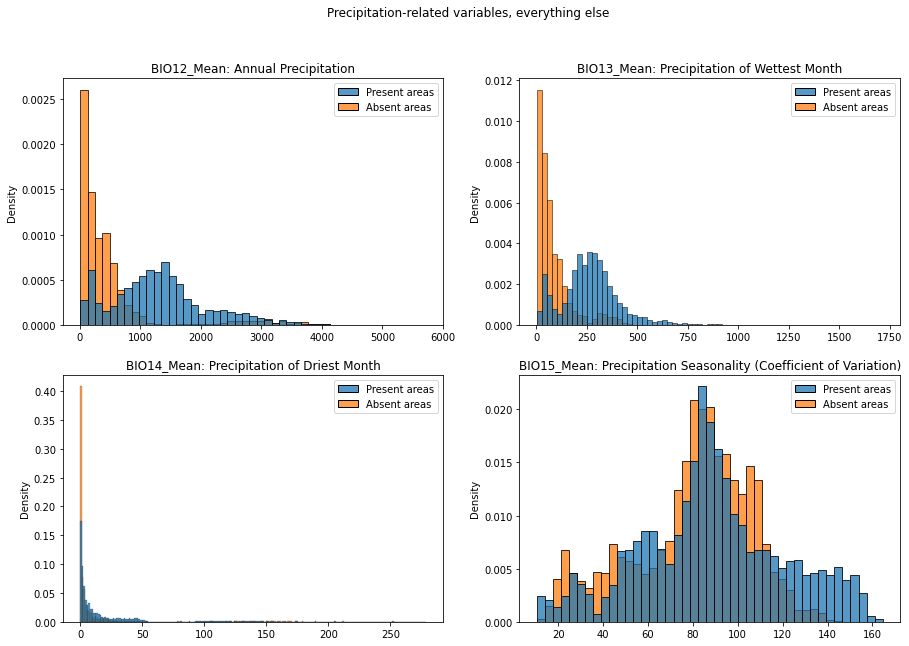

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Precipitation-related variables, everything else')

for idx,ax in zip(group4, axes.flat):
    sns.histplot(ax=ax,data={"Present areas": psuedo_pres[idx], "Absent areas": psuedo_abs[idx]},stat="density",common_norm=False)
    ax.set_title(idx+": "+var_dict[idx])

## 6. Visualizing the correlation matrices<a class="anchor" id="presabs-corr"></a>

<ipython-input-31-f29ae30ad66d>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1]) # if I  don't do this, I won't get equal sized plots


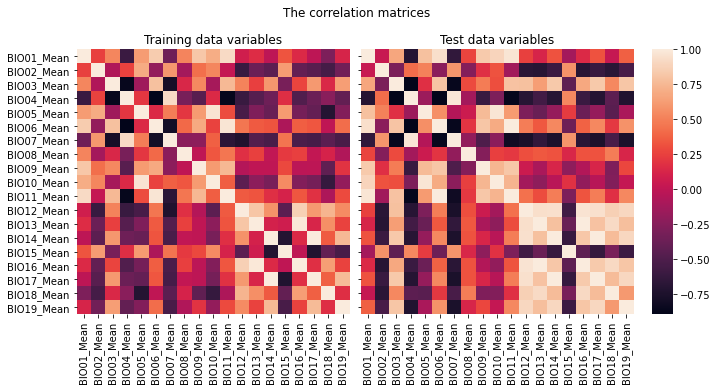

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5.5), sharex=True, sharey=True)
fig.suptitle("The correlation matrices")

# prepare data here
pres_corr = psuedo_pres.drop("HID", axis=1,inplace=False).corr()
abs_corr = psuedo_abs.drop("HID", axis=1,inplace=False).corr()

cbar_ax = fig.add_axes([.91, .203, .03, .67]) # place the colorbar using these coordinates
sns.heatmap(ax=axes.flat[0], data=pres_corr, cbar=False)
sns.heatmap(ax=axes.flat[1], data=abs_corr, cbar=True,cbar_ax=cbar_ax) # only use the colorbar for second plot

axes.flat[0].set_title("Training data variables")
axes.flat[1].set_title("Test data variables")

fig.tight_layout(rect=[0, 0, .9, 1]) # if I  don't do this, I won't get equal sized plots
plt.show()